### This notebook contains a Linear Regression model to predict Price of secondhand cars based on its features.
*  **Data source**: Secondhand_car_sales.csv (Available in github repo) <br>
*  **Data preprocessing**: Dropping null values, unwanted features, removing outliers,relaxing OLS assumptions <br>
*  **Model building**: Creating dummies for Categorical features, Feature scaling, Train_Test split, Model training <br>
*  **Model Evaluation**: L1 & L2 regularization 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
raw_data = pd.read_csv("E:\\Udemy\\Data science\\Python\\Regression Analysis\\Linear Regression using Sklearn\\Practical example\\Secondhand_car_sales.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data_no_na = raw_data.dropna()
data_no_na.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

#### We have 'Body', 'Mileage' , 'Engine Type' that attributes to 'Model' having 312 unique values so will drop 'Model'

In [7]:
data1 = data_no_na.drop('Model',axis=1)
data1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

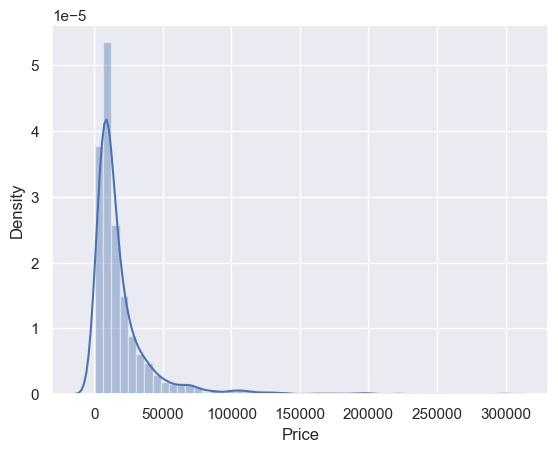

In [8]:
sns.distplot(data1['Price'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

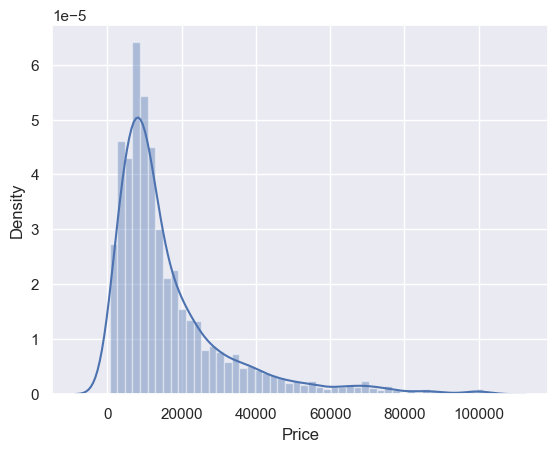

In [9]:
q = data1['Price'].quantile(0.98)
data2 = data1[data1['Price']<q]
sns.distplot(data2['Price'])

In [10]:
data2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.689820,NaN,166.739538,2.738415,NaN,NaN,2006.197312
std,NaN,16332.966734,NaN,102.042365,4.980975,NaN,NaN,6.640292
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11250.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20800.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

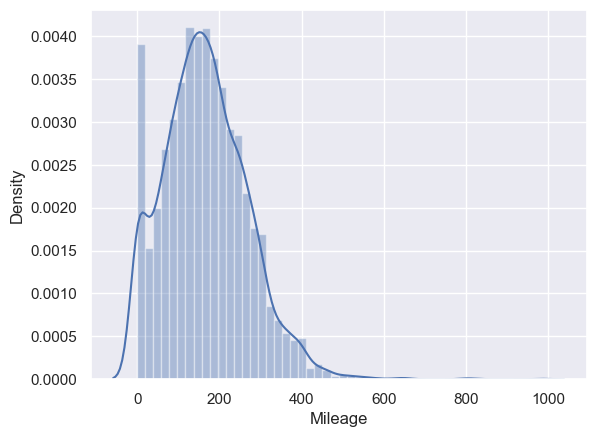

In [11]:
sns.distplot(data2['Mileage'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

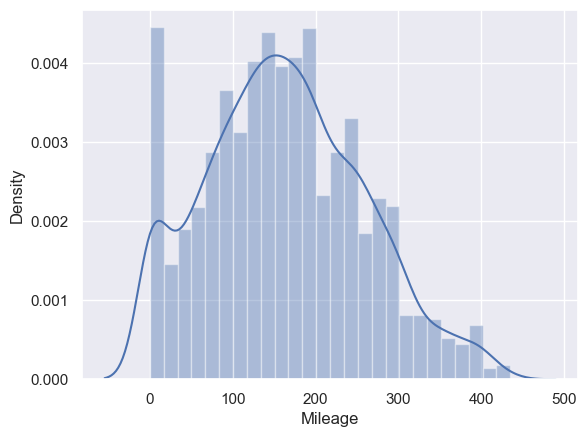

In [12]:
q = data2['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage']<q]
sns.distplot(data3['Mileage'])

In [13]:
data3.describe()

,Price,Mileage,EngineV,Year
count,3903.000000,3903.000000,3903.000000,3903.000000
mean,16928.257740,163.085575,2.742242,2006.294389
std,16346.916322,95.232610,5.005715,6.563430
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,95.000000,1.800000,2003.000000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,20900.000000,230.000000,3.000000,2011.000000
max,103333.000000,435.000000,99.990000,2016.000000


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

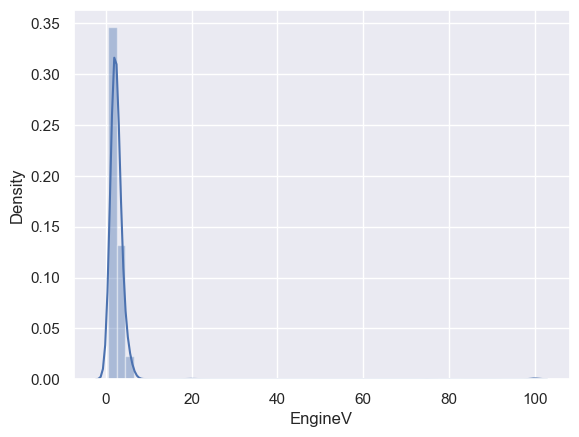

In [14]:
sns.distplot(data3['EngineV'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

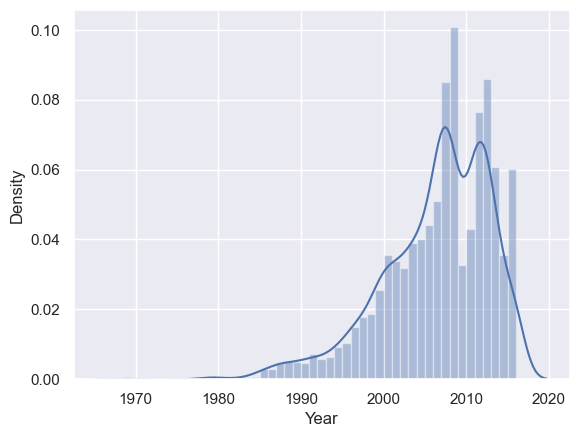

In [15]:
data4 = data3[data3['EngineV']<10]
sns.distplot(data4['Year'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

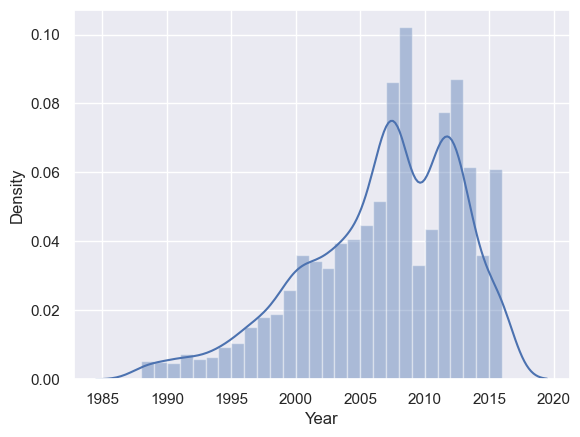

In [16]:
q= data4['Year'].quantile(0.01)
data5 = data4[data4['Year']>q]
sns.distplot(data5['Year'])

In [17]:
data5.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3829,3829.000000,3829,3829.000000,3829.000000,3829,3829,3829.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,849,NaN,1457,NaN,NaN,1772,3466,NaN
mean,NaN,17172.479527,NaN,162.136328,2.445793,NaN,NaN,2006.618177
std,NaN,16393.267151,NaN,94.803403,0.958846,NaN,NaN,6.065856
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000


### OLS assumptions - Linearity

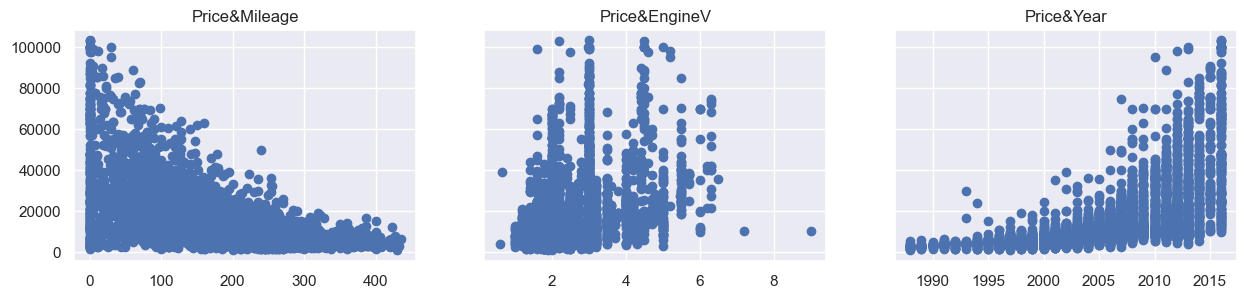

In [18]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data5['Mileage'],data5['Price'])
ax1.set_title('Price&Mileage')
ax2.scatter(data5['EngineV'],data5['Price'])
ax2.set_title('Price&EngineV')
ax3.scatter(data5['Year'],data5['Price'])
ax3.set_title('Price&Year')
plt.show()


C:\Users\YOGESHTIGER\AppData\Local\Temp\ipykernel_11724\665067981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['log_price'] = np.log(data5['Price'])
C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

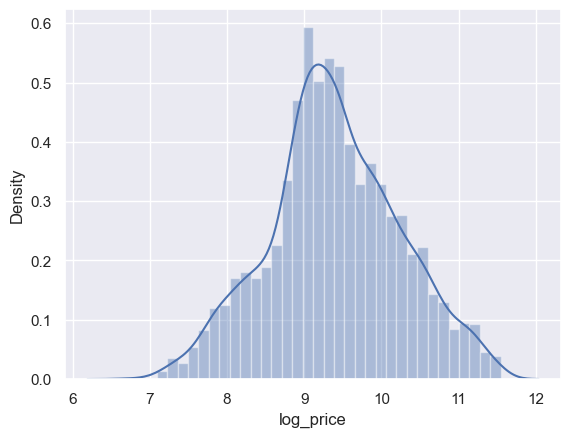

In [19]:
#There is no linearity between Price & EngineV and earlier observed exponential distribution for Price so will use log
data5['log_price'] = np.log(data5['Price'])
sns.distplot(data5['log_price'])

In [20]:
data5.describe(include = 'all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3829,3829.000000,3829,3829.000000,3829.000000,3829,3829,3829.000000,3829.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,849,NaN,1457,NaN,NaN,1772,3466,NaN,NaN
mean,NaN,17172.479527,NaN,162.136328,2.445793,NaN,NaN,2006.618177,9.392073
std,NaN,16393.267151,NaN,94.803403,0.958846,NaN,NaN,6.065856,0.850210
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,9.350102
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000,9.952278


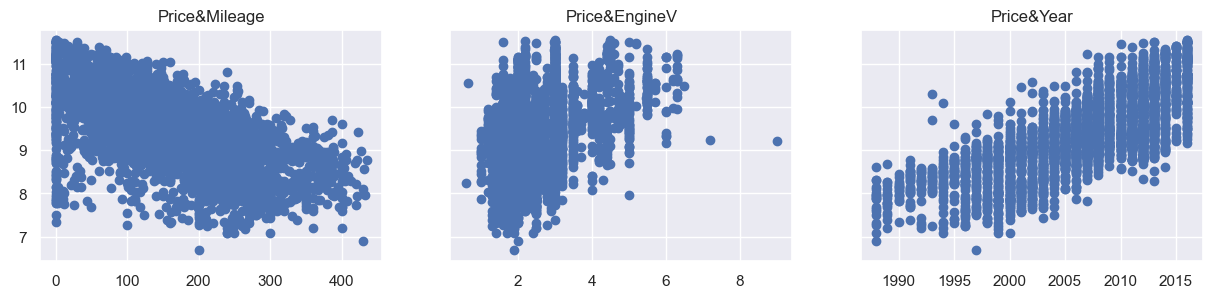

In [21]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data5['Mileage'],data5['log_price'])
ax1.set_title('Price&Mileage')
ax2.scatter(data5['EngineV'],data5['log_price'])
ax2.set_title('Price&EngineV')
ax3.scatter(data5['Year'],data5['log_price'])
ax3.set_title('Price&Year')
plt.show()

In [22]:
data_preprocessed = data5.reset_index(drop=True)
data_preprocessed.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3829,3829.000000,3829,3829.000000,3829.000000,3829,3829,3829.000000,3829.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,849,NaN,1457,NaN,NaN,1772,3466,NaN,NaN
mean,NaN,17172.479527,NaN,162.136328,2.445793,NaN,NaN,2006.618177,9.392073
std,NaN,16393.267151,NaN,94.803403,0.958846,NaN,NaN,6.065856,0.850210
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,9.350102
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000,9.952278


In [23]:
data_clean = data_preprocessed.drop('Price',axis=1)
data_clean.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3829,3829,3829.000000,3829.000000,3829,3829,3829.000000,3829.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,849,1457,NaN,NaN,1772,3466,NaN,NaN
mean,NaN,NaN,162.136328,2.445793,NaN,NaN,2006.618177,9.392073
std,NaN,NaN,94.803403,0.958846,NaN,NaN,6.065856,0.850210
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,94.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,159.000000,2.200000,NaN,NaN,2008.000000,9.350102
75%,NaN,NaN,227.000000,3.000000,NaN,NaN,2011.000000,9.952278


In [24]:
#data_clean1 = data_clean.drop(['EngineV'], axis=1)
#Dropping the engineV decresed our r2& adj r2

In [25]:
#Dealing with categorical values
data_dum = pd.get_dummies(data_clean , drop_first = True)
data_dum.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Assumptions - Multicollinearity

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_dum.drop('log_price',axis=1)
vif_df = pd.DataFrame()
vif_df['Features'] = var.columns
vif_df['VIF'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]
vif_df

,Features,VIF
0,Mileage,4.943521
1,EngineV,11.640466
2,Year,44.116318
3,Brand_BMW,2.603796
4,Brand_Mercedes-Benz,3.013605
5,Brand_Mitsubishi,1.950526
6,Brand_Renault,2.445376
7,Brand_Toyota,2.476183
8,Brand_Volkswagen,3.463084
9,Body_hatch,1.689654


In [27]:
# Scaling the features
target = data_dum['log_price']
features = data_dum.drop(['log_price'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

#### Linear regression model

In [30]:
linear_reg = LinearRegression()
result = linear_reg.fit(x_train, y_train)
result.score(x_train, y_train)

0.8867326951403678

In [31]:
#Calculating adj r-squared
n = x_train.shape[0]
k = x_train.shape[1]
r2 = result.score(x_train, y_train)
adj_r2 = 1 - (1 - r2) * (n-1)/(n-k-1)
adj_r2

0.8860629147568351

In [61]:
print('Test result for Linear model is {:.4f}%'.format(result.score(x_test,y_test)*100))

Test result for Linear model is 87.3996%


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

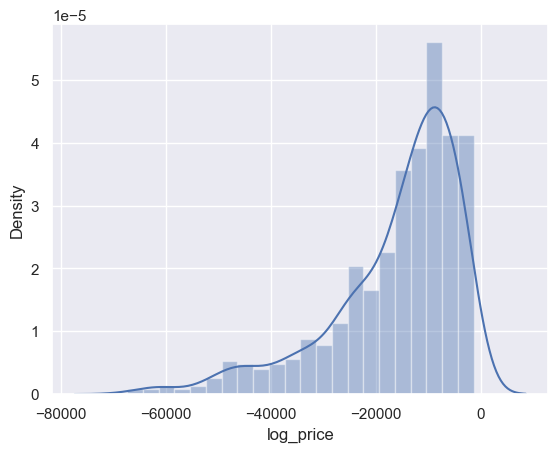

In [37]:
sns.distplot(y_test - np.exp(result.predict(x_test)))

### Sometimes over model can overfit and produce low test scores (not in this case). To prevent Overfitting we use L1 & L2 regularization

#### L1 regularization (Lasso)

In [52]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(alphas = list(np.arange(0.001,5,0.002)), random_state=42 )
lasso_model.fit(x_train,y_train)

LassoCV(alphas=[0.001, 0.003, 0.005, 0.007, 0.009000000000000001, 0.011,
                0.013000000000000001, 0.015, 0.017, 0.019000000000000003, 0.021,
                0.023, 0.025, 0.027000000000000003, 0.029, 0.031, 0.033, 0.035,
                0.037000000000000005, 0.039, 0.041, 0.043000000000000003, 0.045,
                0.047, 0.049, 0.051000000000000004, 0.053000000000000005, 0.055,
                0.057, 0.059000000000000004, ...],
        random_state=42)

In [53]:
lasso_model.score(x_train,y_train)

0.8866574513393037

In [60]:
print('Test result after L1 regularization {:.4f}%'.format(lasso_model.score(x_test,y_test)*100))

Test result after L1 regularization 87.4017%


#### L2 regularization (Ridge)

In [56]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(alphas = list(np.arange(0.5,50,0.5)), normalize=False)
ridge_model.fit(x_train,y_train)

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


RidgeCV(alphas=array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5]),
        normalize=False)

In [57]:
ridge_model.score(x_train,y_train)

0.886731283505136

In [59]:
print('Test score after L2 regularization {:.4f}%'.format(ridge_model.score(x_test,y_test)*100))

Test score after L2 regularization 87.4022%


### In this case , there was no overfitting so there is not much difference in the 3 models